Name : Sanjeev Kumar Khatri

Roll no : 23

Group : CS

Assignment : 03

Githublink : https://github.com/darkamgel/machinelearning-LAB


Practical Assignment - 3

1. Clustering – Finding related posts Measuring the 
relatedness of posts 
2. Preprocessing – similarity measured as a similar 
number of common words 
3. Clustering 
4. Solving our initial challenge Tweaking the parameters

Clustering is a method of arranging items so that similar items are in one cluster and dissimilar items are in distinct ones. 

## Measuring the releatedeness of posts ##
From a machine learning point of view , raw text is useless. If we manage to transform it into meaningful numbers,we can then feed it into our machine learning algorithms, such as clustering. This is also true for more mundane operations on text, such as similarity measurement.




In [1]:
import sys 
sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'

In [21]:
import os
from pathlib import Path

CHART_DIR = Path("charts")
if not CHART_DIR.exists():
    CHART_DIR.mkdir()
    
DATA_DIR = Path("data")
if not DATA_DIR.exists():
    raise Exception("Data directory %s not found" % CHART_DIR.absolute())

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import scipy

DPI = 300

def save_png(name):
    fn = 'B09124_06_%s.png'%name # please ignore, it just helps our publisher :-)
    plt.savefig(str(CHART_DIR / fn), bbox_inches="tight")

## Converting raw text into a bag of words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)
print(vectorizer)

CountVectorizer()


#### Count vectorizer parameters ####
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=&lt;class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\b\w\w+\b',
        tokenizer=None, vocabulary=None)

In [17]:
content = ["How to format my hard disk",
        "Hard disk format problems "]
x = vectorizer.fit_transform(content)
vectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [18]:
print(x.toarray())

[[1 1 1 1 1 0 1]
 [1 1 1 0 0 1 0]]


In [19]:
print(x.toarray().T)

[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


## Counting words

In [25]:
from pathlib import Path
TOY_DIR = Path('data/toy')
posts = []
for fn in TOY_DIR.iterdir():
  with open(fn,'r') as f:
    posts.append(f.read())

vectorizer = CountVectorizer(min_df = 1)

In [30]:
x_train = vectorizer.fit_transform(posts)
num_samples , num_features  = x_train.shape
print("#samples:%d , #features: %d" %(num_samples,num_features) )


#samples:5 , #features: 25


In [31]:
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'save', 'storage', 'store', 'stuff', 'this', 'toy']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])
print(new_post_vec)

  (0, 5)	1
  (0, 7)	1


In [34]:
print(new_post_vec.toarray())

[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [36]:
print(new_post_vec.toarray().T)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [37]:
# calculating euclidean distance

import scipy
def dist_raw(v1 , v2):
  delta = v1-v2
  return scipy.linalg.norm(delta.toarray())

In [43]:
def best_post(x , new_vec , dist_func):
  best_doc = None
  best_dist = float('inf') # infinite value as a starting point
  best_i = None
  for i, post in enumerate(posts):
    if post == new_post:
      continue
    post_vec = x.getrow(i)
    d = dist_func(post_vec , new_vec)
    print("=== Post %i with dist=%.2f:n '%s'" %(i,d,post))
    if d < best_dist:
      best_dist = d
      best_i = i
  print("n==> Best post is %i with dist=%.2f" % (best_i , best_dist))

best_post(x_train , new_post_vec , dist_raw)

=== Post 0 with dist=2.00:n 'Most imaging databases save images permanently.
'
=== Post 1 with dist=5.10:n 'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=4.00:n 'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 3 with dist=1.41:n 'Imaging databases store data.'
=== Post 4 with dist=1.73:n 'Imaging databases provide storage capabilities.'
n==> Best post is 3 with dist=1.41


In [46]:
print(x_train.getrow(3).toarray())

[[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [47]:
print(x_train.getrow(4).toarray())

[[0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]]


#### Normalizing word count vectors ####

We will have to extend dist_raw to calculate the vector distance not on the raw vectors but on the normalized ones instead:

In [53]:
def dist_norm(v1,v2):
  v1_normalized = v1 / scipy.linalg.norm(v1.toarray())
  v2_normalized = v2 / scipy.linalg.norm(v2.toarray())
  delta = v1_normalized - v2_normalized
  return scipy.linalg.norm(delta.toarray())

best_post(x_train, new_post_vec, dist_norm)

=== Post 0 with dist=0.92:
    'Most imaging databases save images permanently.
'
=== Post 1 with dist=0.77:
    'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=1.41:
    'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 3 with dist=0.77:
    'Imaging databases store data.'
=== Post 4 with dist=0.86:
    'Imaging databases provide storage capabilities.'

==> Best post is 1 with dist=0.77


#### Removing less importaant words ####

In [58]:
vect_eng1 = CountVectorizer(min_df = 1 , stop_words = 'english')
sorted(vect_eng1.get_stop_words())[0:20] 

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

here the new words is seven words lighter

In [59]:
x_train_eng1 = vect_eng1.fit_transform(posts)
num_samples_eng1 , num_features_eng1 = x_train_eng1.shape
print(vect_eng1.get_feature_names())

['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'save', 'storage', 'store', 'stuff', 'toy']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


after discarding stop words, we arrive at the following similarity measurement:

In [62]:
new_post_vec_eng1 = vect_eng1.transform([new_post]) 
print(new_post_vec_eng1)

  (0, 4)	1
  (0, 6)	1


In [63]:
best_post(x_train_eng1 , new_post_vec_eng1 , dist_norm)

=== Post 0 with dist=0.86:
    'Most imaging databases save images permanently.
'
=== Post 1 with dist=0.77:
    'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=1.41:
    'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 3 with dist=0.77:
    'Imaging databases store data.'
=== Post 4 with dist=0.86:
    'Imaging databases provide storage capabilities.'

==> Best post is 1 with dist=0.77


#### Stemming #### 

We need a function that reduces words to their specific word stem. Scikit does not contain a stemmer by default. With the Natural Language Toolkit (NLTK), we can download a free software toolkit, which provides a stemmer that we can easily plug into CountVectorizer.

In [64]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import nltk

In [67]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')
s.stem("graphics")

'graphic'

In [69]:
s.stem("imaging") , s.stem("image") , s.stem("imagination") , s.stem("imagine")

('imag', 'imag', 'imagin', 'imagin')

Stem also work with verbs it is not necessary have to result in valid in English words

In [71]:
s.stem("buys") , s.stem("buying") , s.stem("bought")

('buy', 'buy', 'bought')

### Extending the vecorizer with NLTK's stemmer 

In [75]:
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
  def build_analyzer(self):
      analyzer = super(StemmedCountVectorizer,self).build_analyzer()
      return lambda doc : (english_stemmer.stem(w) for w in analyzer(doc))

vect_eng1_stem = StemmedCountVectorizer(min_df = 1 , stop_words = 'english')
print(vect_eng1_stem)

StemmedCountVectorizer(stop_words='english')


This will do the following process for each post:

1. Lowercase the raw post in the preprocessing step (done in the parent class). 
2. Extract all individual words in the tokenization step (done in the parent class).
3. Convert each word into its stemmed version (done in our build_analyzer).
 

In [80]:
X_train_eng1_stem = vect_eng1_stem.fit_transform(posts)
num_samples_eng1_stem, num_features_engl_stem = X_train_engl_stem.shape
print("#samples: %d, #features: %d" % (num_samples_eng1_stem,  num_features_engl_stem))
print(vect_eng1_stem.get_feature_names())

#samples: 5, #features: 17
['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'save', 'storag', 'store', 'stuff', 'toy']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [81]:
new_post_vec_eng1_stem = vect_eng1_stem.transform([new_post]) 
print(new_post_vec_eng1_stem)

best_post(X_train_eng1_stem, new_post_vec_eng1_stem, dist_norm)

  (0, 4)	1
  (0, 5)	1
=== Post 0 with dist=0.63:
    'Most imaging databases save images permanently.
'
=== Post 1 with dist=0.77:
    'Imaging databases store data. Imaging databases store data. Imaging databases store data.'
=== Post 2 with dist=1.41:
    'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'
=== Post 3 with dist=0.77:
    'Imaging databases store data.'
=== Post 4 with dist=0.86:
    'Imaging databases provide storage capabilities.'

==> Best post is 0 with dist=0.63


## stop words on steriods using TF-IDF ##

 * term frequency - inverse document frequency (TF-IDF)

In [85]:
def tfidf(term , doc , corpus):
  tf = doc.count(term)/len(doc)
  idf = np.log(float(len(corpus))/(len([d for d in corpus if term in d])))
  tf_idf = tf * idf
  print("term='%s'   doc=%-17s tf=%.2f   idf=%.2f   tf*idf=%.2f"%
          (term, doc, tf, idf, tf_idf))
  return tf_idf

# defining some documents
a , abb ,abc = ["a"] , ["a","b","b"] , ["a" , "b" , "c"]
#defining some corpora
D = [a,abb,abc]

print("=> tfidf=%.2f" % tfidf("a", a, D))
print("=> tfidf=%.2f" % tfidf("a", abb, D))
print("=> tfidf=%.2f" % tfidf("a", abc, D))
print("=> tfidf=%.2f" % tfidf("b", abb, D))
print("=> tfidf=%.2f" % tfidf("b", abc, D))
print("=> tfidf=%.2f" % tfidf("c", abc, D))

term='a'   doc=['a']             tf=1.00   idf=0.00   tf*idf=0.00
=> tfidf=0.00
term='a'   doc=['a', 'b', 'b']   tf=0.33   idf=0.00   tf*idf=0.00
=> tfidf=0.00
term='a'   doc=['a', 'b', 'c']   tf=0.33   idf=0.00   tf*idf=0.00
=> tfidf=0.00
term='b'   doc=['a', 'b', 'b']   tf=0.67   idf=0.41   tf*idf=0.27
=> tfidf=0.27
term='b'   doc=['a', 'b', 'c']   tf=0.33   idf=0.41   tf*idf=0.14
=> tfidf=0.14
term='c'   doc=['a', 'b', 'c']   tf=0.33   idf=1.10   tf*idf=0.37
=> tfidf=0.37


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

class StemmedTfidVectorizer(TfidfVectorizer):

  def build_analyzer(self):
    analyzer = super(TfidfVectorizer , self).build_analyzer()
    return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vect_tfidf = StemmedTfidVectorizer(stop_words = 'english')
print(vect_tfidf)



StemmedTfidVectorizer(stop_words='english')


The resulting document vectors will not contain counts any more. Instead, they will contain the individual TF-IDF values per term.

In [94]:
X_train_tfidf = vect_tfidf.fit_transform(posts)
num_samples_tfidf, num_features_tfidf = X_train_tfidf.shape
print("#samples: %d, #features: %d" % (num_samples_tfidf,  num_features_tfidf))
print(vect_tfidf.get_feature_names())

#samples: 5, #features: 17
['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'save', 'storag', 'store', 'stuff', 'toy']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Our current text preprocessing phase includes the following steps:
1. Firstly, tokenizing the text
2. This is followed by throwing away words that occur way too often to be of any help in
detecting relevant posts
3. Throwing away words that occur so infrequently that there is little chance that they will
occur in future posts
4. Counting the remaining words
5. Finally, calculating TF-IDF values from the counts, considering the whole text corpus

## K-means Clustering ##


K-means is the most widely used flat clustering algorithm. After initializing it with the desired number of clusters, `num_clusters`, it maintains that number of so-called cluster centroids. Initially, it will pick any `num_clusters` posts and set the centroids to their feature vector. Then it will go through all other posts and assign them the nearest centroid as their current cluster. Following this, it will move each centroid into the middle of all the vectors of that particular class. This changes, of course, the cluster assignment. Some posts are now nearer to another cluster. So it will update the assignments for those changed posts. This is done as long as the centroids move considerably. After some iterations, the movements will fall below a threshold and we consider clustering to be converged.


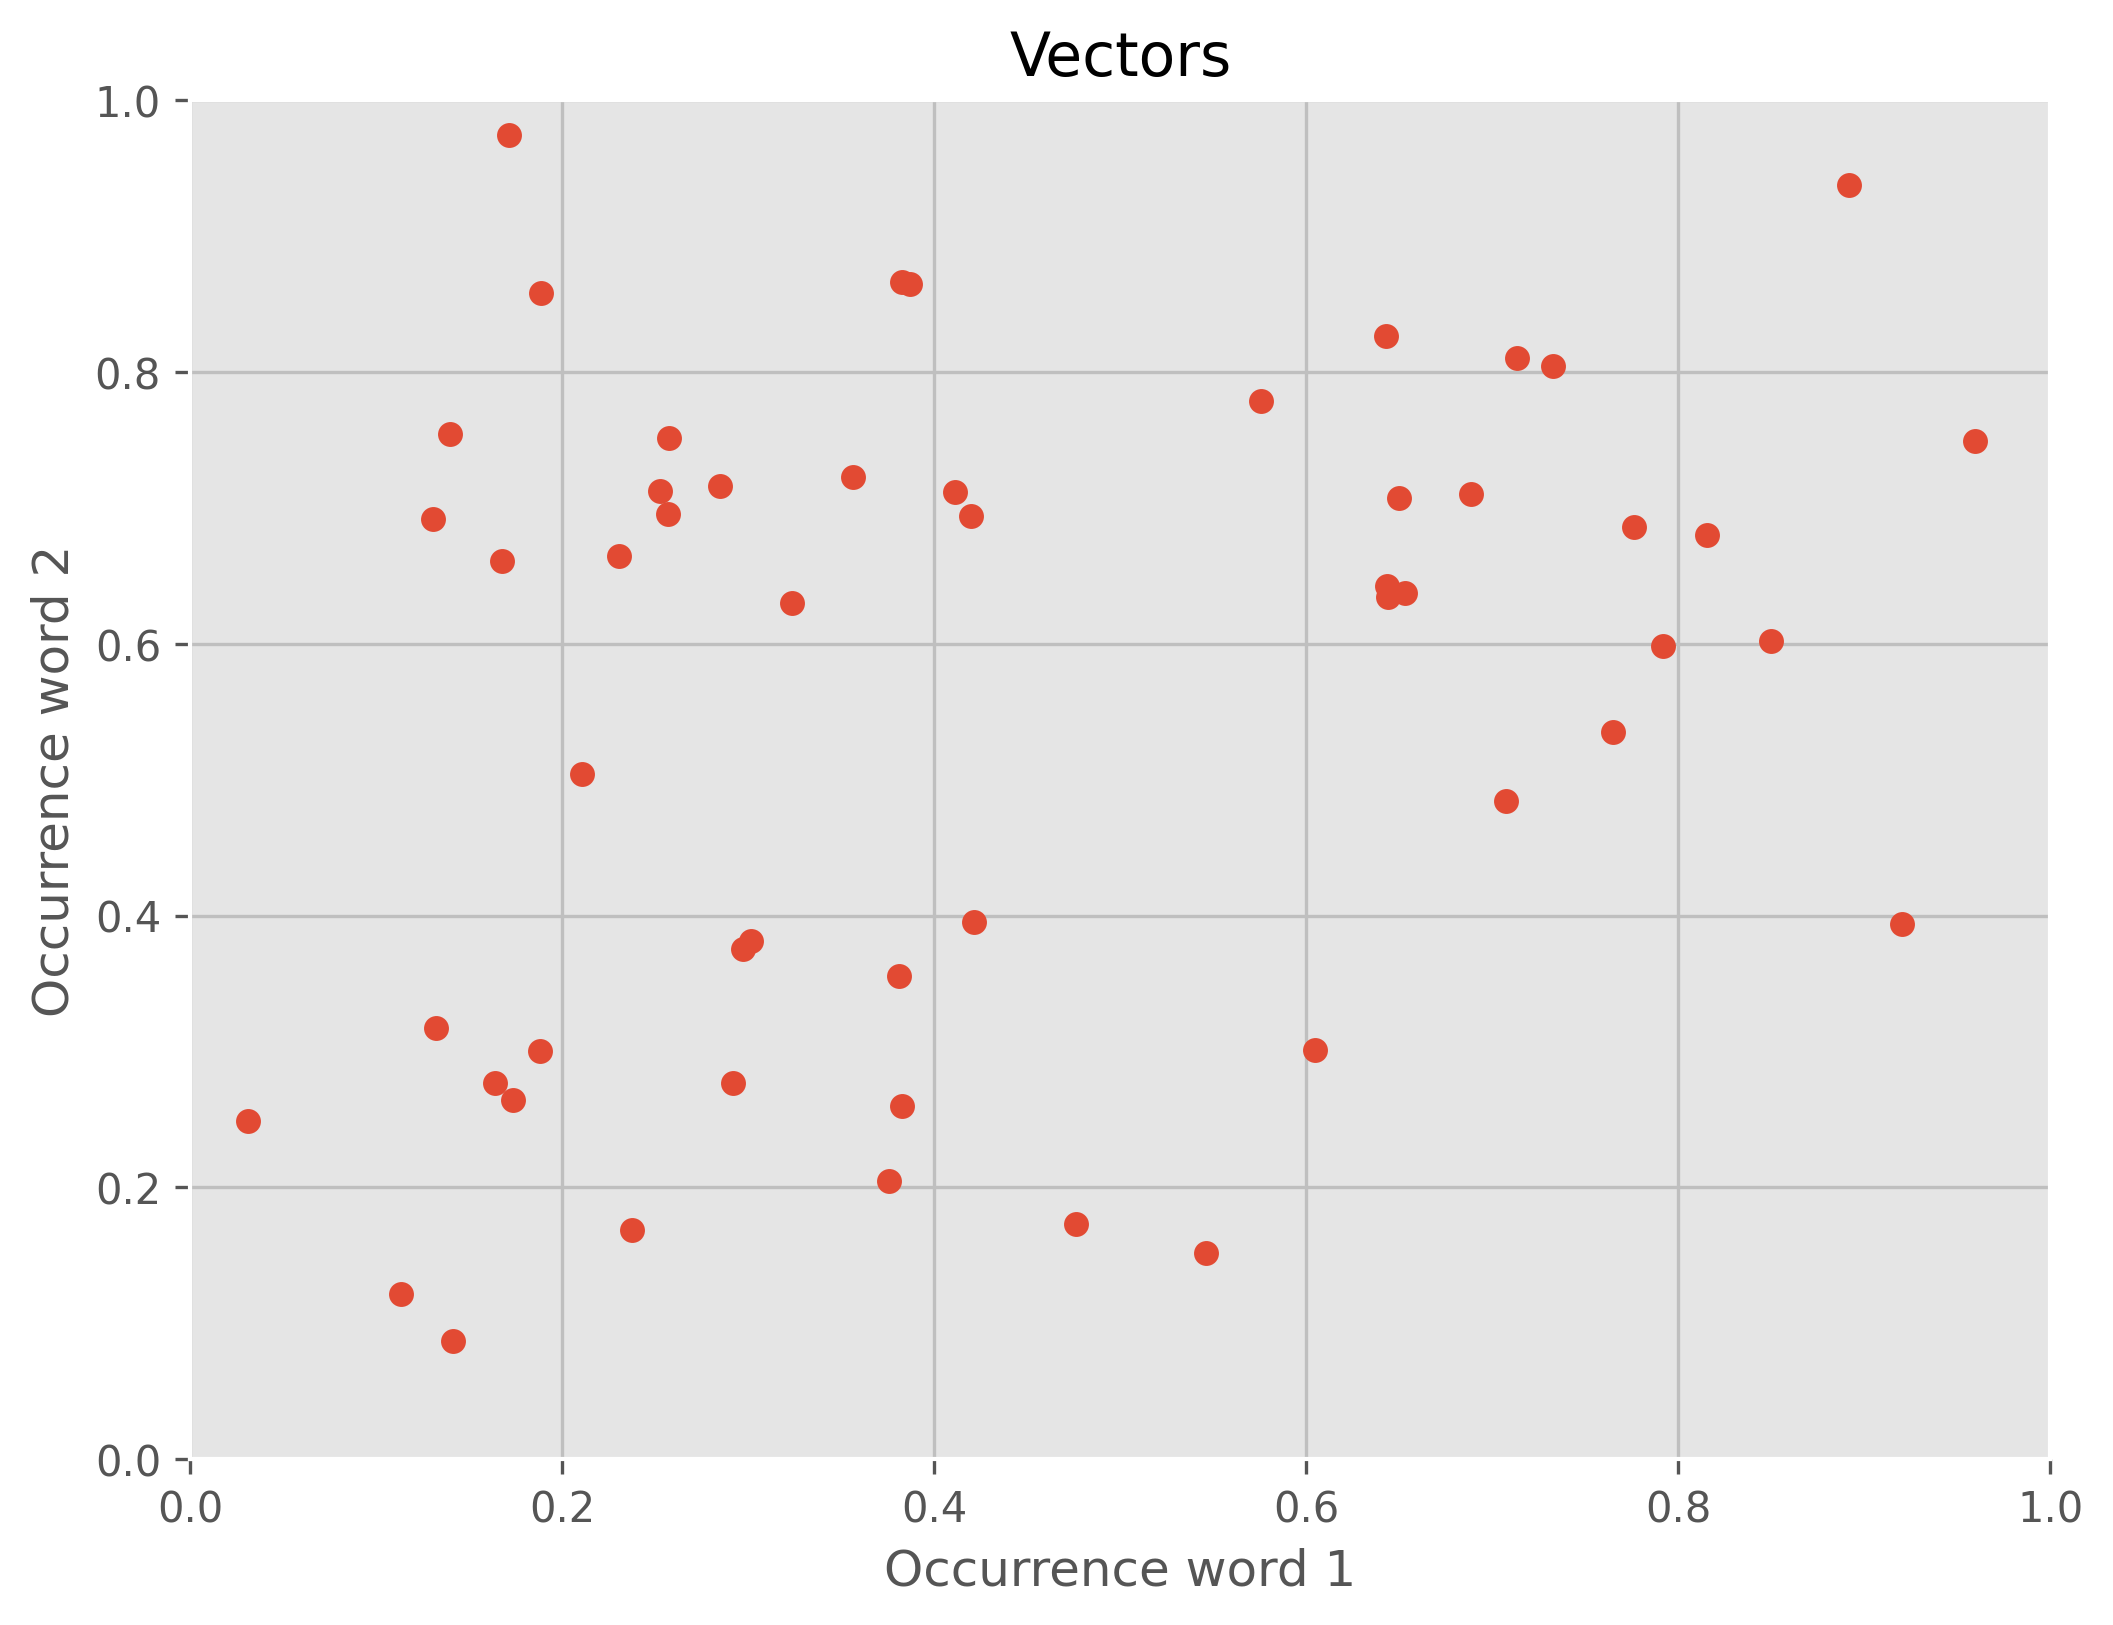

In [95]:
from sklearn.cluster import KMeans

seed = 2
np.random.seed(seed)  # to reproduce the data later on

num_clusters = 3


def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    plt.figure(num=None, figsize=(8, 6), dpi=DPI)
    if km:
        plt.scatter(x, y, s=30, c=km.predict(list(zip(x, y))))
    else:
        plt.scatter(x, y, s=30)

    plt.title(title)
    plt.xlabel("Occurrence word 1")
    plt.ylabel("Occurrence word 2")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0, ymax=1)
    plt.xlim(xmin=0, xmax=1)
    plt.grid(True, linestyle='-', color='0.75')

    return plt


xw1 = scipy.stats.norm(loc=0.3, scale=.15).rvs(20)
yw1 = scipy.stats.norm(loc=0.3, scale=.15).rvs(20)

xw2 = scipy.stats.norm(loc=0.7, scale=.15).rvs(20)
yw2 = scipy.stats.norm(loc=0.7, scale=.15).rvs(20)

xw3 = scipy.stats.norm(loc=0.2, scale=.15).rvs(20)
yw3 = scipy.stats.norm(loc=0.8, scale=.15).rvs(20)

x = np.append(np.append(xw1, xw2), xw3)
y = np.append(np.append(yw1, yw2), yw3)

plot_clustering(x, y, "Vectors")
save_png("01_clustering_data")

After running one iteration of K-means, that is, taking any two vectors as starting points, assigning the labels to the rest, and updating the cluster centers to be the center point of all points in that cluster, we get the following clustering:

Clustering Iterarion -1

Initialization complete
Iteration 0, inertia 4.7485267474116775


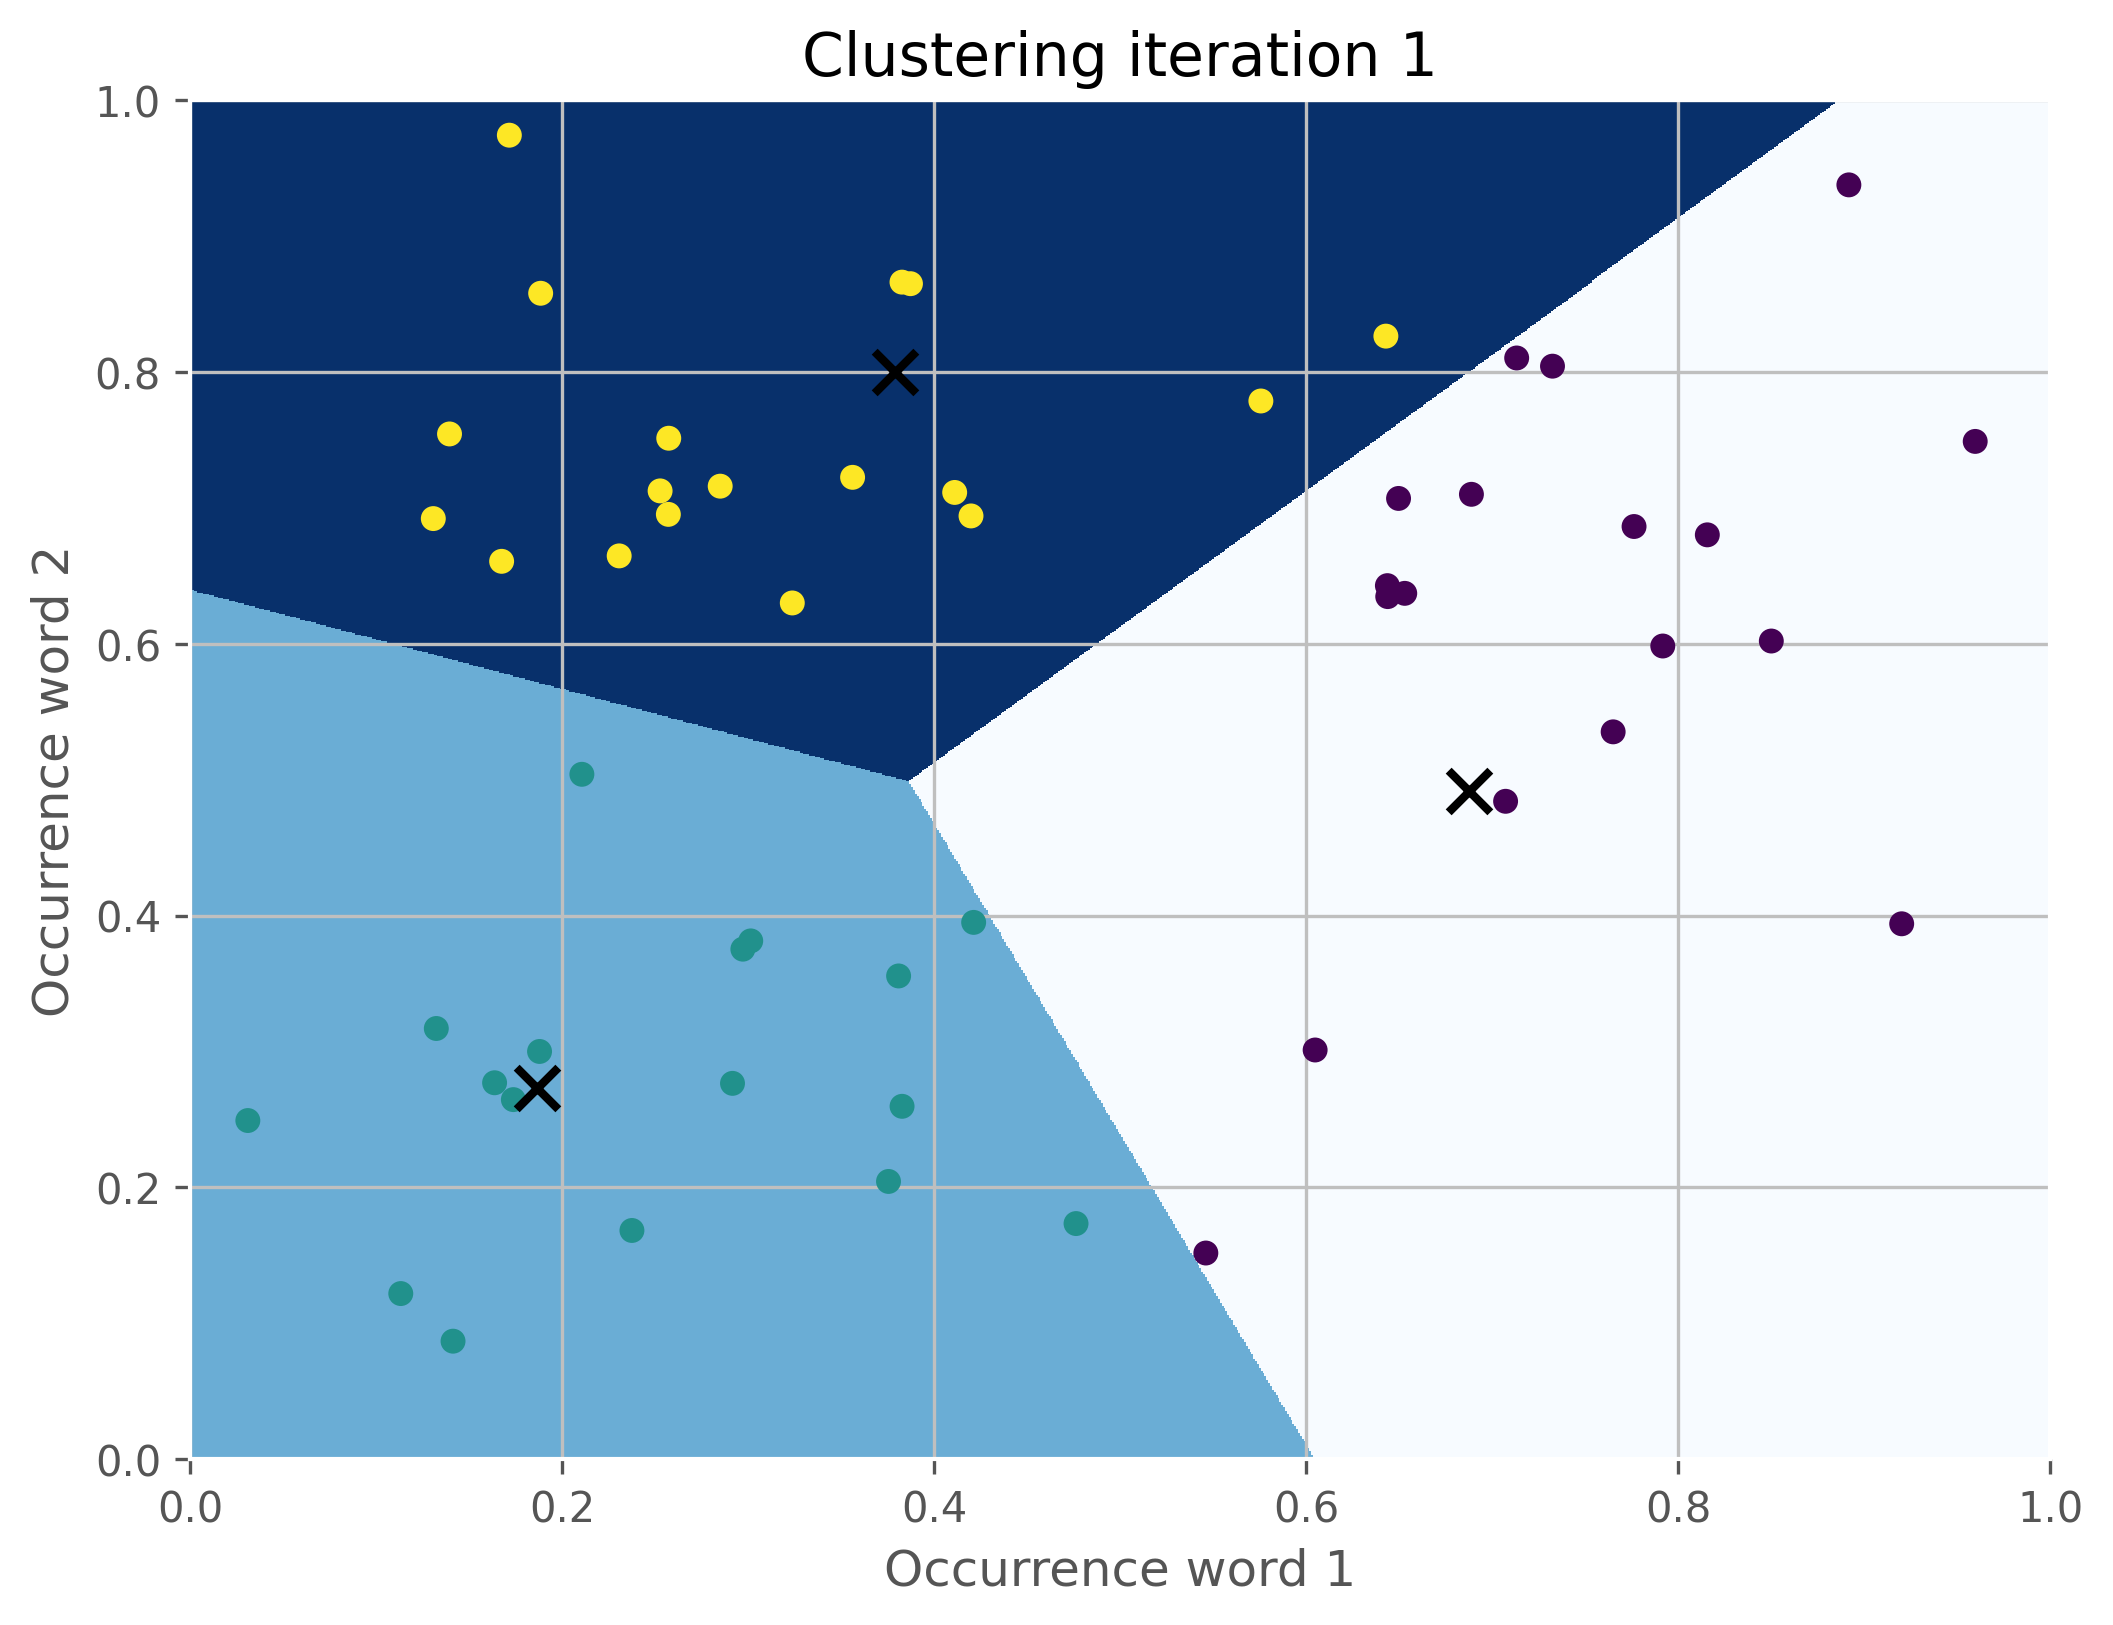

In [97]:
mx, my = np.meshgrid(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001))

km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(np.array(list(zip(x, y))))

Z = km.predict(np.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
plt.imshow(Z, interpolation='nearest',
           extent=(mx.min(), mx.max(), my.min(), my.max()),
           cmap=plt.cm.Blues,
           aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
save_png("02_clustering_iteration_1")

Clustering Iteration -2

Because the cluster centers moved, we have to reassign the cluster labels and recalculate the cluster centers. After iteration 2, we get the following clustering:

Initialization complete
Iteration 0, inertia 4.7485267474116775
Iteration 1, inertia 3.3787856939654475


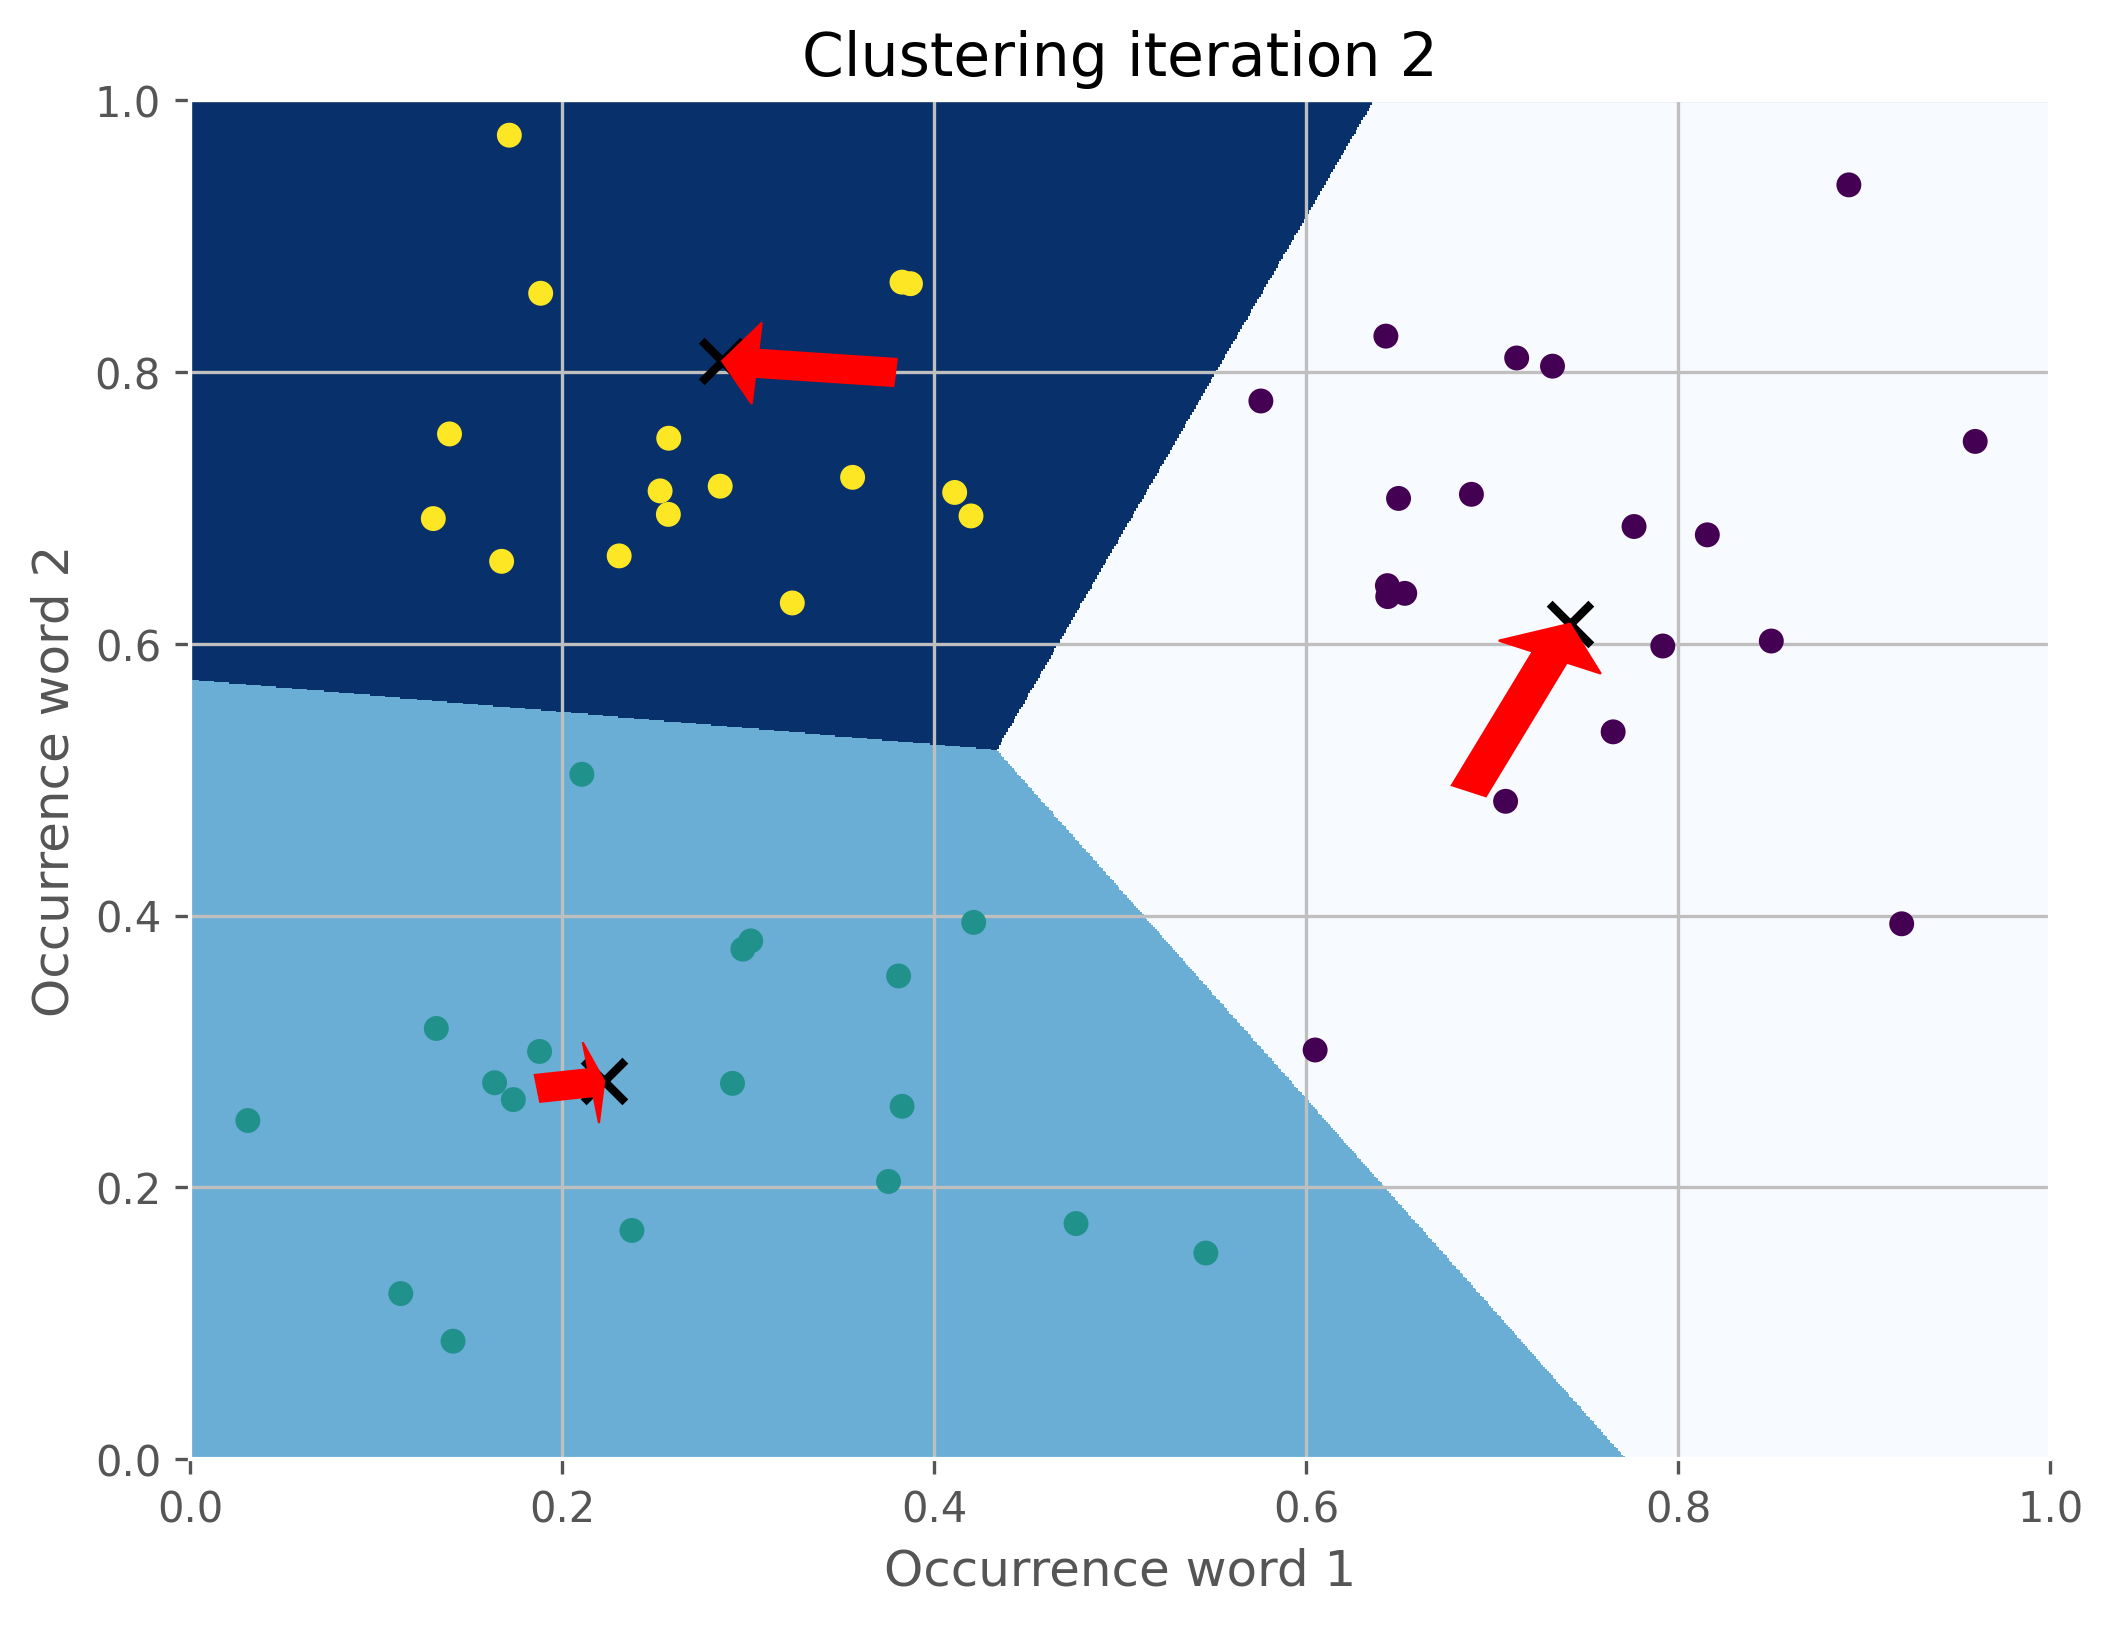

In [98]:
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(np.array(list(zip(x, y))))

Z = km.predict(np.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 2", km=km)
plt.imshow(Z, interpolation='nearest',
           extent=(mx.min(), mx.max(), my.min(), my.max()),
           cmap=plt.cm.Blues,
           aspect='auto', origin='lower')

c2a, c2b, c2c = km.cluster_centers_
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

plt.gca().add_patch(plt.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1, color='red'))
plt.gca().add_patch(plt.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1, color='red'))
plt.gca().add_patch(plt.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1, color='red'))

save_png("03_clustering_iteration_2")

The arrows show the movements of the cluster centers. After ten iterations. as shown in the following screenshot of this example, the cluster centers don't move noticeably anymore (scikit's tolerance threshold is 0.0001 by default)


lets do for 10 iterations we get

Initialization complete
Iteration 0, inertia 4.7485267474116775
Iteration 1, inertia 3.3787856939654475
Iteration 2, inertia 2.5999573206286963
Iteration 3, inertia 2.496571140237421
Iteration 4, inertia 2.447223016211801
Converged at iteration 4: strict convergence.


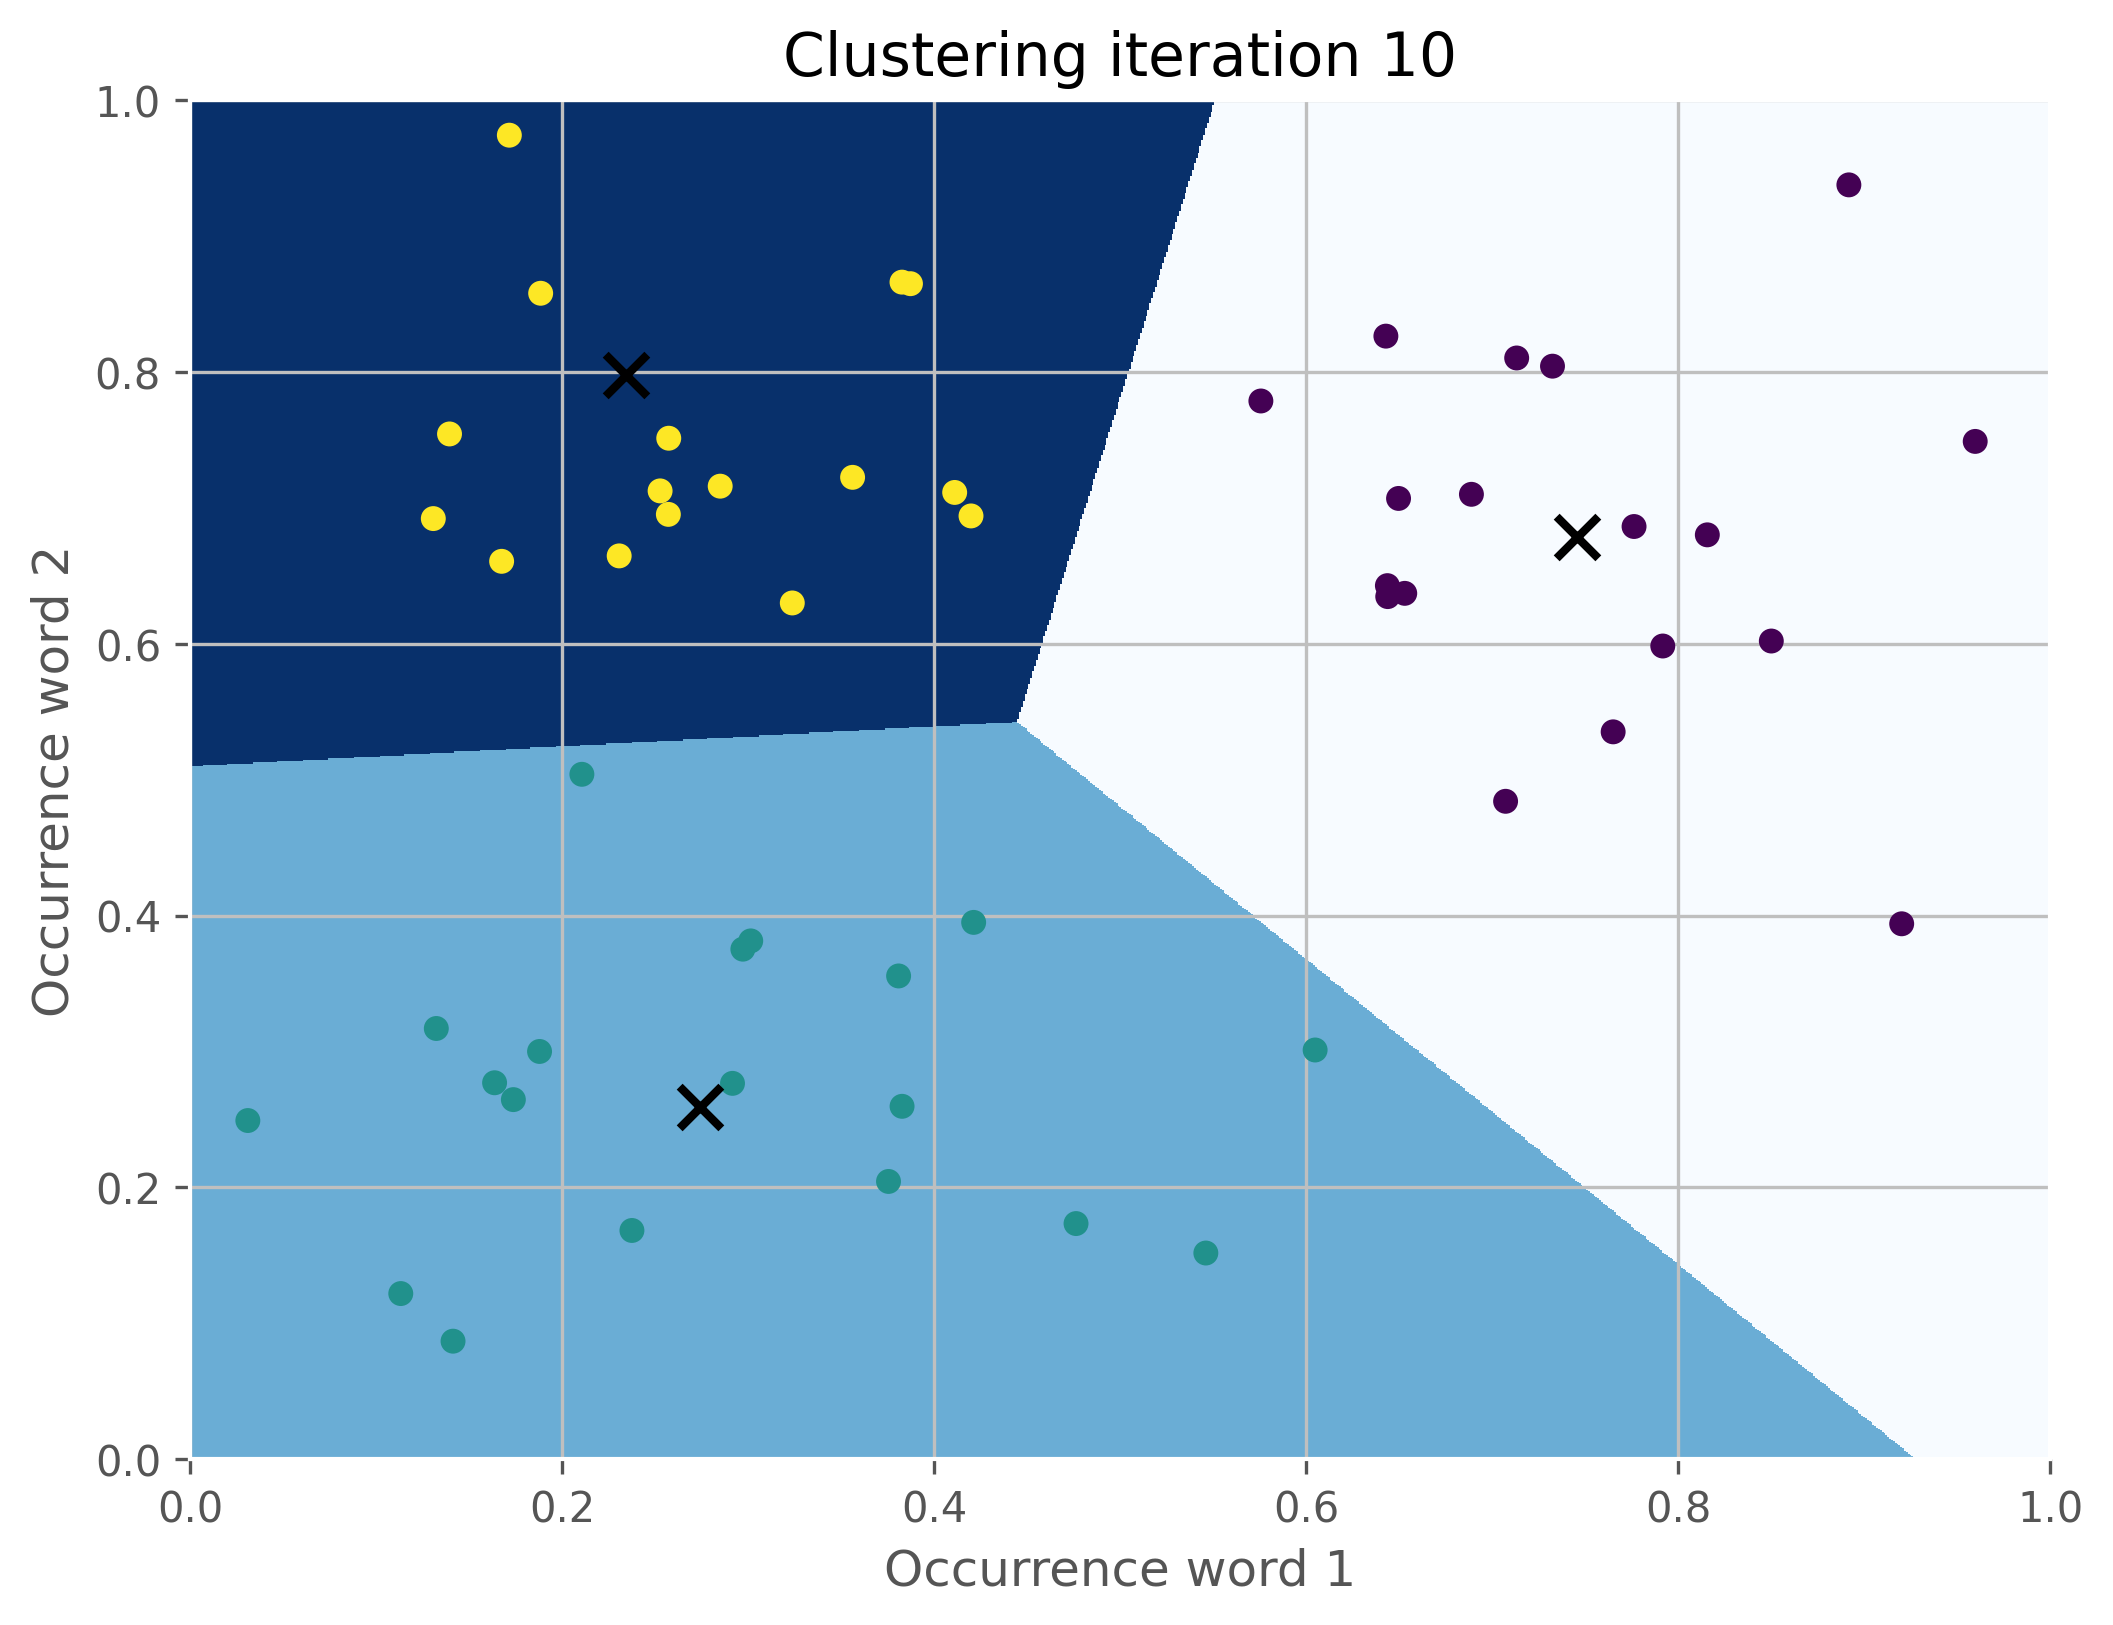

In [99]:
# 10 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=10,
            random_state=seed)
km.fit(np.array(list(zip(x, y))))

Z = km.predict(np.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 10", km=km)
plt.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=plt.cm.Blues,
             aspect='auto', origin='lower')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
save_png("04_clustering_iteration_final")

now lets test this in our real data

In [103]:
import sklearn

all_data = sklearn.datasets.fetch_20newsgroups(subset = 'all')
print(len(all_data.filenames))

18846


In [104]:
print(all_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


choosing train and test data

In [106]:
train_data = sklearn.datasets.fetch_20newsgroups(subset = 'train')
print(len(train_data.filenames))

11314


In [107]:
test_data = sklearn.datasets.fetch_20newsgroups(subset = 'test')
print(len(test_data.filenames))

7532


For simplicity's sake, we will restrict ourselves to only some newsgroups so that the overall experimentation cycle is shorter. We can achieve this with the categories parameter:

In [108]:
groups = ['comp.graphics', 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
 'comp.windows.x', 'sci.space']
train_data = sklearn.datasets.fetch_20newsgroups(subset='train',
                    categories=groups)
print(len(train_data.filenames))

3529


In [109]:
test_data = sklearn.datasets.fetch_20newsgroups(subset = 'test' , categories = groups)

In [110]:
print(len(test_data.filenames))

2349


### Clustering Posts

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

class StemmedTfidfVectorizer(TfidfVectorizer):

    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vect_tfidf = StemmedTfidfVectorizer(#min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore')


vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore')
vectorized = vectorizer.fit_transform(train_data.data)

num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 3529, #features: 4712


In [114]:
num_clusters = 50
from sklearn.cluster import KMeans
km = KMeans(n_clusters = num_clusters ,n_init=1 , verbose = 1 , random_state = 3)
km.fit(vectorized)

Initialization complete
Iteration 0, inertia 5686.0525436637
Iteration 1, inertia 3164.8875140123528
Iteration 2, inertia 3132.2077111951467
Iteration 3, inertia 3111.712575878138
Iteration 4, inertia 3098.583773647865
Iteration 5, inertia 3092.1905280374385
Iteration 6, inertia 3087.2770892443127
Iteration 7, inertia 3084.1004773772715
Iteration 8, inertia 3082.7997677507046
Iteration 9, inertia 3082.234382617422
Iteration 10, inertia 3081.9487984162006
Iteration 11, inertia 3081.843333964575
Iteration 12, inertia 3081.790665037127
Iteration 13, inertia 3081.752217763826
Iteration 14, inertia 3081.659718679884
Iteration 15, inertia 3081.616791469508
Iteration 16, inertia 3081.5894842981634
Iteration 17, inertia 3081.57097030357
Converged at iteration 17: strict convergence.


KMeans(n_clusters=50, n_init=1, random_state=3, verbose=1)

In [116]:
print("km.labels_=%s" %km.labels_)


km.labels_=[48 23 31 ...  6  2 22]


In [117]:
print("km.labels_.shape=%s" %km.labels_.shape)

km.labels_.shape=3529


now lets try to solve our initial problem

In [123]:
new_post = '''
Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks. '''

new_post_vec = vectorizer.transform([new_post])
new_post_label = km.predict(new_post_vec)[0]

similar_indices = (km.labels_ == new_post_label).nonzero()[0]

similar = []
for i in similar_indices:
  dist = scipy.linalg.norm((new_post_vec - vectorized[i]).toarray())
  similar.append((dist , train_data.data[i]))
similar = sorted(similar)
print("count similar: %i" %len(similar))

show_at_1 = similar[0]
show_at_2 = similar[len(similar) // 10]
show_at_3 = similar[len(similar) // 2]

print(show_at_1)
print(show_at_2)
print(show_at_3)


count similar: 56
(1.0378441731334074, "From: Thomas Dachsel <GERTHD@mvs.sas.com>\nSubject: BOOT PROBLEM with IDE controller\nNntp-Posting-Host: sdcmvs.mvs.sas.com\nOrganization: SAS Institute Inc.\nLines: 25\n\nHi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n| Thomas Dachsel                       

#### Another look at noise ####

We should not expect perfect clustering in the sense that posts from the same newsgroup (for example, comp.graphics) are also clustered together. An example will give us a quick impression of the noise that we have to expect. For the sake of simplicity, we will focus on one of the shorter posts:

In [124]:
post_group = zip(train_data.data, train_data.target)

# Create a list of tuples that can be sorted by
# the length of the posts
all = [(len(post[0]), post[0], train_data.target_names[post[1]])
       for post in post_group]
graphics = sorted([post for post in all if post[2] == 'comp.graphics'])
print(graphics[5])

(245, 'From: SITUNAYA@IBM3090.BHAM.AC.UK\nSubject: test....(sorry)\nOrganization: The University of Birmingham, United Kingdom\nLines: 1\nNNTP-Posting-Host: ibm3090.bham.ac.uk\n\n==============================================================================\n', 'comp.graphics')


In [127]:
noise_post = graphics[5][1]
analyzer = vectorizer.build_analyzer()
print(analyzer)
print(list(analyzer(noise_post)))

<function StemmedTfidfVectorizer.build_analyzer.<locals>.<lambda> at 0x7fc5fc1cb830>
['situnaya', 'ibm3090', 'bham', 'ac', 'uk', 'subject', 'test', 'sorri', 'organ', 'univers', 'birmingham', 'unit', 'kingdom', 'line', 'nntp', 'post', 'host', 'ibm3090', 'bham', 'ac', 'uk']


In [129]:
useful = set(analyzer(noise_post)).intersection(vectorizer.get_feature_names())
print(sorted(useful))

['ac', 'birmingham', 'host', 'kingdom', 'nntp', 'sorri', 'test', 'uk', 'unit', 'univers']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [130]:
for term in sorted(useful):
    print('IDF(%-10s) = %.2f' % (term, vectorizer._tfidf.idf_[vectorizer.vocabulary_[term]]))

IDF(ac        ) = 3.51
IDF(birmingham) = 6.77
IDF(host      ) = 1.74
IDF(kingdom   ) = 6.68
IDF(nntp      ) = 1.77
IDF(sorri     ) = 4.14
IDF(test      ) = 3.83
IDF(uk        ) = 3.70
IDF(unit      ) = 4.42
IDF(univers   ) = 1.91
